# Linear Regression from scratch

A general linear Regression Model.

Features Optimization through: 

- Normal Equation 
- Gradient Descent with MSE Error 

Data and Error can be plotted. 

Note: Datasets that are used are very bad. 
Gradient Descent normally Leads to better results here since it doesnt calculate perfect tetas on an ill-formed. 

In [221]:
import random 
import numpy
import math 
import matplotlib.pyplot as plt

In [222]:
# data preperation class 
class data_prep:                                 #Data preparation and normalization for the model 
    def __init__(self,location):
        self.data = open(location, "r+")
        self.data = self.data.read()
        self.data = self.data.splitlines()
        
    def lNumberizer(self):
            count = 0
            labels = {}
            for x in self.data:
                if x[1][0] not in labels:
                    labels[x[1][0]] = count
                    count+=1
            for x in self.data:
                x[1] = labels[x[1][0]]
            return self.data
        
    def numberize(self,dataset,toNumberize):
        data = numpy.transpose(dataset)
        for x in toNumberize: 
            count= 0 
            labels = {}
            for z in data[int(x)]:
                if z not in labels:
                    labels[z] = count
                    count+=1
            for w in range (len(data[int(x)])):
                data[int(x)][w] = labels[data[int(x)][w]]
        data = numpy.transpose(data)
        data = data.tolist()
        return data
                       
    def transform(self,numbers = "y"):
        data = self.data
        del data[0]
        if data[0] == "":
            del data[0]
        self.N = len(data)
        for x in range(self.N):
            data[x] = data[x].replace(",", "-split-")
            data[x] = data[x].split("-split-")
        if numbers == "n":
            print("Please specifiy the features that are not floats. (0 1 4)")
            answer = input().split()
            data = self.numberize(data,answer)
        for w in range(self.N):
            for y in range(len(data[w])):
                data[w][y] = float(data[w][y]) 
        features = len(data[0])-1
        labels = []
        for x in range(self.N):
            labels.append( data[x][features:])
            data[x] = data[x][:features]
        self.transformedX =numpy.array(data)
        self.transformedY = numpy.array(labels)
         
    def normalize(self):
        features = numpy.transpose(self.transformedX)
        label = self.transformedY
        toDelete = []
        for y in range(len(features)):
            maxi = max(features[y])
            mini = min(features[y])
            if maxi == mini: 
               print("Feature " + str(y) + " was spotted to be useless (Only 1 possibe value). It will be removed from the dataset")
               toDelete.append(y)
            else: 
                for z in range (len(features[y])):
                    features[y][z] =  (features[y][z]- mini)/ (maxi - mini)
        newFeatures = []
        for z in range(len(features)): 
            if z not in toDelete: 
                       newFeatures.append(features[z])
        newFeatures = numpy.array(newFeatures)
        
        maxiy = max(label)
        miniy = min(label)
        for w in range(len(label)):
            label[w] =  (label[w]- miniy)/ (maxiy - miniy)   
        newFeatures = numpy.transpose(newFeatures)
        self.normalizedY = label
        self.normalizedX = newFeatures

In [205]:
class linear_regressor:
    def __init__(self,data,label):
        self.X = numpy.expand_dims(data, axis=0)
        self.Y = label
        self.n = len(data)
        self.f = len(data[0])
        self.teta = numpy.random.rand(self.f,1)
        self.b = numpy.random.rand(1,1)
        
    def predict_y(self):              # predicts Y with current tetas 
        predictions = []
        for x in range(self.n):
            prediction = numpy.dot(self.X[0][x],self.teta) + self.b
            predictions.append(prediction[0][0])
        return numpy.expand_dims(numpy.array(predictions), axis=0) 
    
    def calc_loss(self):                            #Finds current Loss 
        predictions = self.predict_y()
        MSE = numpy.sum(numpy.subtract(predictions, self.Y)**2) / (self.n*2)
        RMSE = math.sqrt(MSE)
        return RMSE
    
    def dLoss(self):                                 # Calcs Gradient based on MSE for Gradient Descent
        predictions = self.predict_y()
        dtet0 = numpy.sum(numpy.subtract(predictions, self.Y))/(self.n)
        dtet1 = numpy.zeros(self.f)
        
        for x in range(self.n):
            prediction = numpy.dot(self.X[0][x],self.teta) + self.b
            add = numpy.subtract(prediction[0], self.Y[x])* self.X[0][x]
            dtet1 = numpy.add(dtet1,add)
        dtet1 = dtet1/self.n
        return dtet0, dtet1
        
    
    def gradientDescentLinearRegression(self,alpha=0.00001,iter=50):
        print("Initial loss: " + str(self.calc_loss()))    
        lossValues = []                                                     # Uses not RMSE but MSE 
        for x in range(iter):                                               # for gradient. Still works
            lossValues.append(self.calc_loss())                           
            dteta0, dteta1 = self.dLoss()
            self.teta = self.teta - (numpy.transpose(numpy.expand_dims((alpha*dteta1),axis=0  ))) 
            self.b = numpy.subtract(self.b, (alpha*dteta0))
        self.plot_loss(lossValues)
        print("gradient descent is finnished. The current loss is: " + str(self.calc_loss()))
            
    def normalEquation(self):                                 #Optimizes teta based on Normal Equation
        print("Initial Loss: " +  str(self.calc_loss()))
        bias = numpy.expand_dims(numpy.ones(self.n), axis=0)
        X = numpy.transpose(self.X[0])
        X = numpy.concatenate((bias,X), axis=0)
        X = numpy.transpose(X)
        step1 = numpy.dot(numpy.transpose(X), X)
        step2 = numpy.linalg.inv(step1) 
        step3 = numpy.dot(step2,numpy.transpose(X)) 
        step4 = numpy.dot(step3,self.Y)
        self.b= numpy.expand_dims(step4[0],axis=0)
        self.teta = step4 [1:]
        print("Applying the Normal Equation resulted in a loss of: " + str(self.calc_loss()))
        
    
    def plotFeatures(self,feature):                              #Two features to plot.
        plt.figure(figsize=(8, 8))
        values = numpy.transpose(self.X[0])
        plt.plot(values[feature],self.Y,marker='.',linestyle='none')
        plt.title("Feature Nr." + str(feature) + " + current regression function")   
        plt.plot(values[feature],(self.teta[feature] * values[feature] + self.b)[0])
        plt.show()

    def plot_loss(self,loss):
        plt.figure(figsize=(8, 8))
        plt.plot(loss)
        plt.title("Loss over time")   
        plt.show()
    
    def test(self,data,label):                           # Test a new Dataset based on current Model
        testFeatures =  numpy.expand_dims(data, axis=0)
        testLabels = label
        predictions = []
        for x in range(len(testFeatures)):
            prediction = numpy.dot(testFeatures[0][x],self.teta) + self.b
            predictions.append(prediction[0][0])
        predictions = numpy.expand_dims(numpy.array(predictions), axis=0)
        MSE = numpy.sum(numpy.subtract(predictions, self.Y)**2) / (len(testFeatures[0])*2)
        RMSE = math.sqrt(MSE)
        print("This model has an Error of " + str(RMSE) + " on the test Data")
        
    

            
        
        

In [218]:
#Data prep:

train = data_prep("data/Linear/csv/03_train.csv")
train.transform()
train.normalize()


test = data_prep("data/Linear/csv/03_test.csv")
test.transform()
test.normalize()



In [219]:
Lin = linear_regressor(train.normalizedX,train.normalizedY)
Lin.normalEquation()
Lin.test(test.normalizedX,test.normalizedY)
print(Lin.teta)
print(Lin.b)

Initial Loss: 66.95313315934935
Applying the Normal Equation resulted in a loss of: 5.821615370317826
This model has an Error of 11.043909163999789 on the test Data
[[1642.47770041]
 [ 121.94092144]
 [ -18.86242408]
 [-709.24638938]
 [  16.12296429]
 [-127.94856764]
 [1164.35683316]]
[[-1022.56892702]]


Initial loss: 80.38129646286494


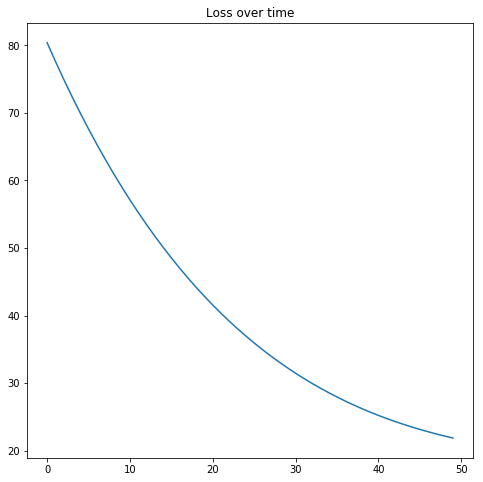

gradient descent is finnished. The current loss is: 21.613742117796697
This model has an Error of 1.0354771916551126 on the test Data
[[0.5134241 ]
 [0.61748303]
 [0.61002678]
 [0.67540332]
 [0.0826521 ]
 [0.83135206]
 [0.1042054 ]]
[[-0.65120056]]


In [220]:
Lin = linear_regressor(train.normalizedX,train.normalizedY)
Lin.gradientDescentLinearRegression(iter=50)
Lin.test(test.normalizedX,test.normalizedY)
print(Lin.teta)
print(Lin.b)